In [ ]:
# duplicates needs dropping (probably based on headline and summary)

In [1]:
import sys
import os

import pandas as pd
import seaborn as sns

from database import database
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
news_doc = []
for doc in database.news_collection.find({}):
    news_doc.append(doc)

In [3]:
news_df = pd.DataFrame(news_doc)
news_df.head()

,_id,datetime,headline,image,source,summary,url,api,counterparty,sentiment,date
0,616a9214d6b0969db79ff380,1634342006,"Dow Jones Futures: Microsoft, Tesla Rival Xpen...",https://s.yimg.com/uu/api/res/1.2/8E9xXtahKzzU...,Yahoo,"With a confirmed market rally, how aggressive ...",https://finnhub.io/api/news?id=0a71ef5127fb093...,Finnhub,TSLA,0.0,2021-10-16
1,616a9214d6b0969db79ff381,1634345700,Tesla Will Probably Beat Earnings Estimates. W...,https://s.yimg.com/ny/api/res/1.2/Gc1PiHZWDkam...,Yahoo,Tesla will easily beat earnings expectations ...,https://finnhub.io/api/news?id=b21fa618c07df48...,Finnhub,TSLA,1.0,2021-10-16
2,616a9214d6b0969db79ff382,1634342280,Musk Trolls Bezos Over Wealth. He Could have T...,https://s.yimg.com/ny/api/res/1.2/eLHfCjFR8LCr...,Yahoo,"In a tweet, the Tesla CEO drew attention to hi...",https://finnhub.io/api/news?id=e94ea5b855e79f8...,Finnhub,TSLA,0.0,2021-10-16
3,616a9214d6b0969db79ff383,1634335078,'Big Short' investor Burry says he's no longer...,https://s.yimg.com/uu/api/res/1.2/BnJkedCmxSup...,Yahoo,Burry's Scion Asset Management said in a regul...,https://finnhub.io/api/news?id=d162aec79de9fdb...,Finnhub,TSLA,0.0,2021-10-16
4,616a9214d6b0969db79ff384,1634335078,'Big Short' investor Burry says he's no longer...,https://static.reuters.com/resources/r/?m=02&d...,Reuters,"Investor Michael Burry of ""The Big Short"" fame...",https://finnhub.io/api/news?id=73b71d9c99019a1...,Finnhub,TSLA,0.0,2021-10-16


In [13]:
keywords = ["Ownership change", "Change of control", "Acceleration", "accelerate", "Default", "Insolvency", "Insolvent", "Delay", "Late", "Failure", "fail", "Dispute", "Liquidation", "Liquidator", "Margin call", "Haircut", "Bank run", "Termination", "Moratorium", "Suspension", "Suspend", "Fraud", "misrepresentation", "Fine", "sanction", "Breach", "Reschedule", "Restructuring", "Restructure", "Credit event", "Losses", "Loss", "Bailout", "Bailin", "Bankrupt", "Receivership", "Receiver", "Judicial Management", "Judicial Manager", "Administration", "Administrator", "Sequestrate", "Sequestration", "Support", "Capital call", "Liquidity event", "Negative trends", "Price changes", "Board infighting", "Corruption", "Inappropriate or ultra vires dealings", "Negative working capital", "Acquisition", "LBO", "Qualified audit opinion", "Regulatory breach", "Non-performing assets", "Provisions", "Force majeur", "Distress", "Frozen", "Delisted", "Sued", "Suit", "Arrested", "Disappeared", "Uncontactable"]

def keyword_count (news):
    keywords_count_dict = {}
    
    for keyword in keywords:
        for news_str in news:
            news_str = news_str.split()
            for word in news_str:
                if keyword == word:
                    keywords_count_dict[keyword] = keywords_count_dict.get(keyword, 0) + 1
    
    return keywords_count_dict

def plot_keyword_frequency (news_keyword_frequency):
    news_list = news_keyword_frequency.items()
    news_list = sorted(news_list) 
    x, y = zip(*news_list) 


    plt.plot(x, y)
    plt.xticks(rotation='vertical')
    plt.show()
    
def keyword_wordcloud (text_string):
    wordcloud = WordCloud().generate(text_string)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

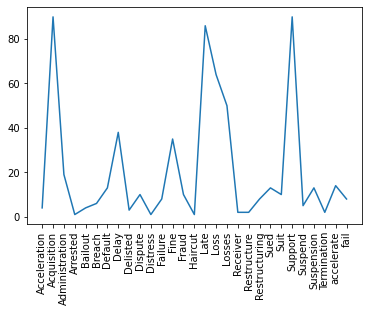

In [5]:
headline_keyword_frequency = keyword_count(news_df.headline)
plot_keyword_frequency(headline_keyword_frequency)

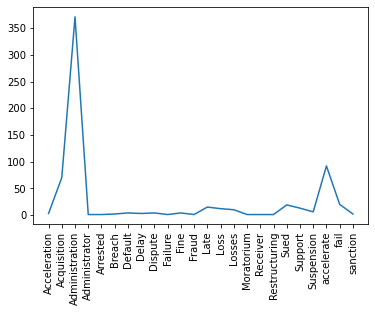

In [6]:
summary_keyword_frequency = keyword_count(news_df.summary)
plot_keyword_frequency(summary_keyword_frequency)

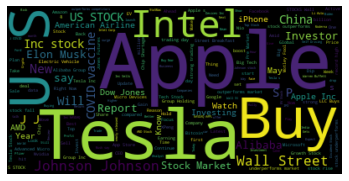

In [16]:
headline_text = " ".join(headline for headline in news_df.headline)
keyword_wordcloud(headline_text)

In [20]:
def counterparty_keyword_count (news_counterparty, target_counterparty: str):
    keywords_count_dict = {}
    
    target_news_headline = news_counterparty.loc[news_counterparty["counterparty"]==target_counterparty, "headline"]
    target_news_summary = news_counterparty.loc[news_counterparty["counterparty"]==target_counterparty, "summary"]


    for keyword in keywords:
        for news_str in target_news_summary:
            news_str = news_str.split()
            for word in news_str:
                if keyword == word:
                    keywords_count_dict[keyword] = keywords_count_dict.get(keyword, 0) + 1
    
    return keywords_count_dict

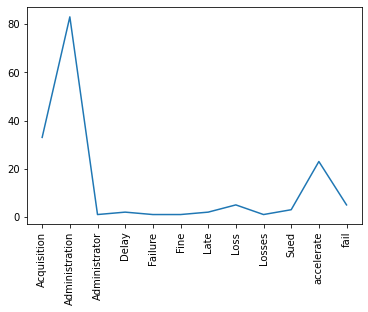

In [22]:
# graph for TSLA
plot_keyword_frequency(counterparty_keyword_count (news_df, 'TSLA'))